In [1]:
import pandas as pd
import numpy as np

In [2]:
yelp = pd.read_csv("yelp.csv")

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
yelp['text length'] = yelp['text'].apply(len)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
%matplotlib inline

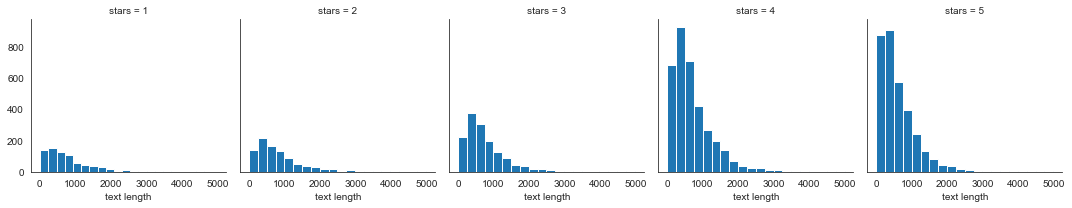

In [8]:
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'text length', bins=20)

<AxesSubplot:xlabel='stars', ylabel='text length'>

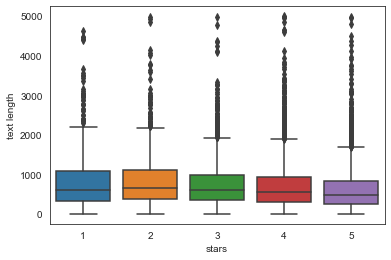

In [9]:
sns.boxplot(x='stars', y='text length', data=yelp)

<AxesSubplot:xlabel='stars', ylabel='count'>

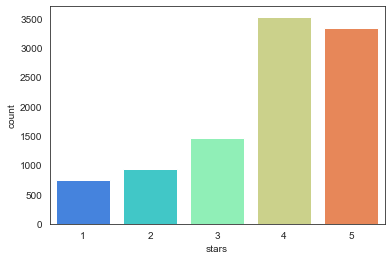

In [10]:
sns.countplot(x='stars', data=yelp, palette='rainbow')

In [11]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [12]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

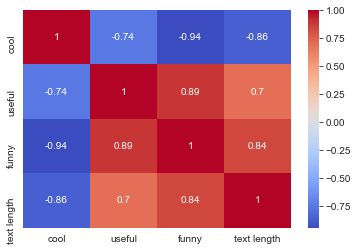

In [15]:
sns.heatmap(stars.corr(), cmap='coolwarm', annot=True)

In [18]:
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [23]:
yelp_class.stars.value_counts()

5    3337
1     749
Name: stars, dtype: int64

In [35]:
import string
from nltk.corpus import stopwords

def text_process(msg):
    #Retira pontuação
    nopunc = [char for char in msg if char not in string.punctuation]
    
    #juntar strings
    nopunc = ''.join(nopunc)
    
    return  [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [49]:
x = yelp_class['text']
y = yelp_class['stars']

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer=text_process)
x = cv.fit_transform(x)

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.3, random_state=101)

In [57]:
from sklearn.naive_bayes import MultinomialNB
np = MultinomialNB()

In [58]:
np.fit(x_train, y_train)

MultinomialNB()

In [60]:
pred = np.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix,classification_report

In [62]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[157  71]
 [ 24 974]]


              precision    recall  f1-score   support

           1       0.87      0.69      0.77       228
           5       0.93      0.98      0.95       998

    accuracy                           0.92      1226
   macro avg       0.90      0.83      0.86      1226
weighted avg       0.92      0.92      0.92      1226



In [63]:
from sklearn.feature_extraction.text import TfidfTransformer

In [64]:
from sklearn.pipeline import Pipeline

In [70]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [71]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [72]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('classifier', MultinomialNB())])

In [73]:
predictions = pipeline.predict(X_test)

In [74]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[155  73]
 [ 15 983]]
              precision    recall  f1-score   support

           1       0.91      0.68      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.92      0.83      0.87      1226
weighted avg       0.93      0.93      0.92      1226

